# Checkpoint 01: Análise de Dados de Consumidores de Energia

# Integrantes do grupo

* Arthur Vieira Mariano – RM554742
* Guilherme Henrique Maggiorini – RM554745
* Ian Rossato Braga – RM554989

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [36]:
# Exercício 1

df = pd.read_csv("household_power_consumption.txt",
                 sep=";",
                 na_values="?")

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


# Exercício 2

Pergunta: Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Resposta: Global_active_power: energia realmente consumida (kW).

Global_reactive_power: energia armazenada e devolvida pela rede (kVAR).

In [ ]:
# Exercício 3

df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [38]:
# Exercício 4

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Day_of_week"] = df["Date"].dt.day_name()

print(df.head)

<bound method NDFrame.head of               Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                4.216                  0.418   
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
4       2006-12-16  17:28:00                3.666                  0.528   
...            ...       ...                  ...                    ...   
2075254 2010-11-26  20:58:00                0.946                  0.000   
2075255 2010-11-26  20:59:00                0.944                  0.000   
2075256 2010-11-26  21:00:00                0.938                  0.000   
2075257 2010-11-26  21:01:00                0.934                  0.000   
2075258 2010-11-26  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_m

In [ ]:
# Exercício 5

df_2007 = df[df["Date"].dt.year == 2007]
daily_mean = df_2007.groupby("Day_of_week")["Global_active_power"].mean()

print(daily_mean)

Day_of_week
Friday       1.030751
Monday       1.030050
Saturday     1.266637
Sunday       1.364190
Thursday     1.007786
Tuesday      1.030750
Wednesday    1.097645
Name: Global_active_power, dtype: float64


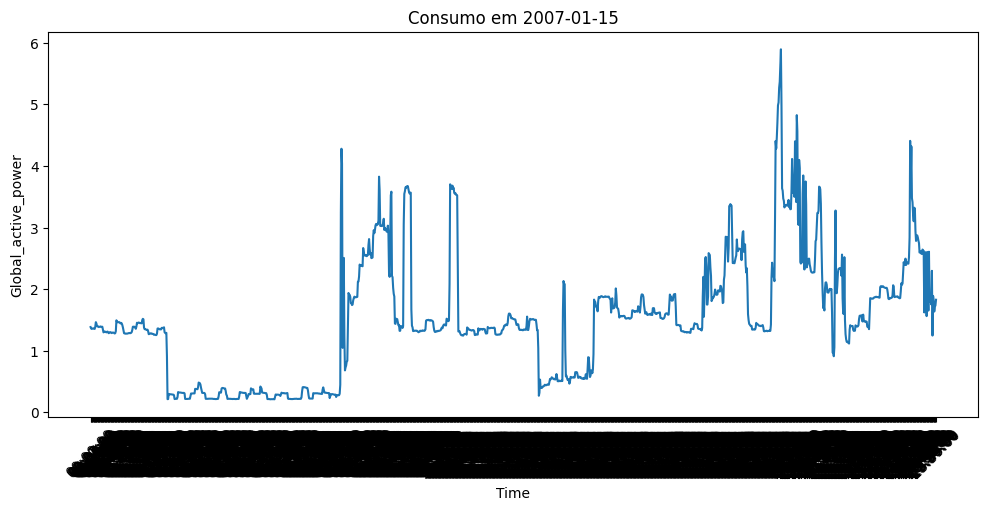

In [43]:
# Exercício 6

day = "2007-01-15"

df_day = df[df["Date"] == day]

plt.figure(figsize=(12,5))
sns.lineplot(data=df_day, x="Time", y="Global_active_power")
plt.title(f"Consumo em {day}")
plt.xticks(rotation=45)
plt.show()

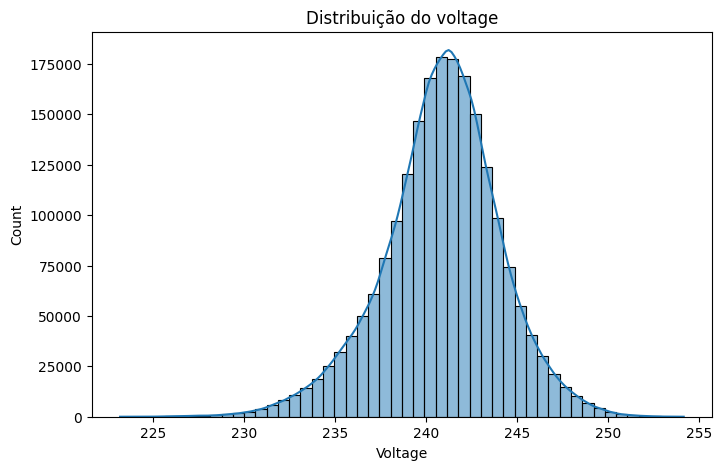

In [ ]:
# Exercício 7

plt.figure(figsize=(8,5))
sns.histplot(df["Voltage"].dropna(), bins=50, kde=True)
plt.title("Distribuição do voltage")
plt.show()

In [ ]:
# Exercício 8

df["YearMonth"] = df["Date"].dt.to_period("M")
monthly_mean = df.groupby("YearMonth")["Global_active_power"].mean()

print(monthly_mean)

YearMonth
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010-11    1.196854
Freq: M, Name: Global_active_p

In [ ]:
# Exercício 9

daily_total = df.groupby("Date")["Global_active_power"].sum()
max_day = daily_total.idxmax()

print(max_day)

2006-12-23 00:00:00


In [ ]:
# Exercício 10

df["IsWeekend"] = df["Date"].dt.weekday >= 5
df.groupby("IsWeekend")["Global_active_power"].mean()

,Global_active_power
IsWeekend,
False,1.035472
True,1.234232


In [39]:
# Exercício 11

df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


In [ ]:
# Exercício 12

df["Total_Sub_metering"] = (df["Sub_metering_1"] +
                            df["Sub_metering_2"] +
                            df["Sub_metering_3"])

print(df["Total_Sub_metering"])

0          18.0
1          17.0
2          19.0
3          18.0
4          18.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Total_Sub_metering, Length: 2075259, dtype: float64


In [ ]:
# Exercício 13

monthly = df.groupby("YearMonth")[["Total_Sub_metering", "Global_active_power"]].mean()
monthly[monthly["Total_Sub_metering"] > monthly["Global_active_power"]]

,Total_Sub_metering,Global_active_power
YearMonth,,
2006-12,10.873181,1.901295
2007-01,10.423518,1.546034
2007-02,9.486135,1.401084
2007-03,10.212863,1.318627
2007-04,6.839375,0.891189
2007-05,8.452442,0.985862
2007-06,7.379151,0.826814
2007-07,5.697724,0.667367
2007-08,6.979336,0.764186


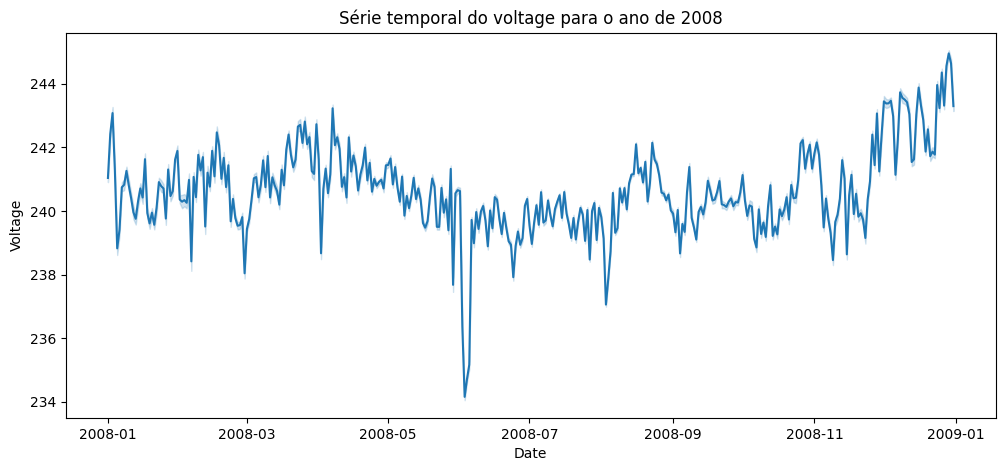

In [ ]:
# Exercício 14

df_2008 = df[df["Date"].dt.year == 2008]

plt.figure(figsize=(12,5))
sns.lineplot(data=df_2008, x="Date", y="Voltage")
plt.title("Série temporal do voltage para o ano de 2008")
plt.show()

In [ ]:
# Exercício 15

df["Month"] = df["Date"].dt.month
summer = df[df["Month"].isin([6,7,8])]
winter = df[df["Month"].isin([12,1,2])]
print(summer["Global_active_power"].mean(), winter["Global_active_power"].mean())

0.7266815219278782 1.4176230462106605


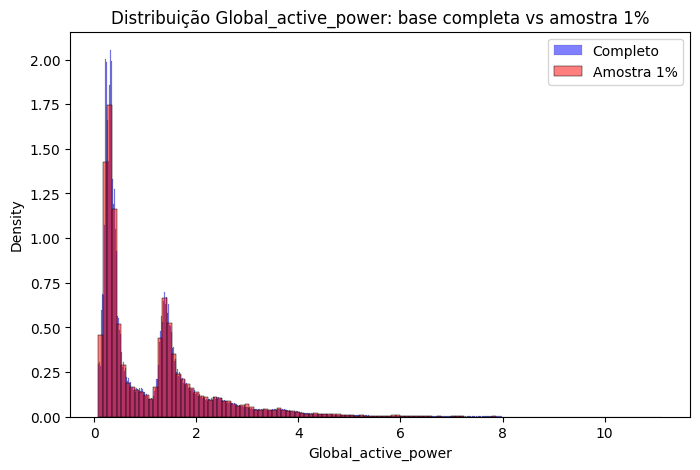

In [ ]:
# Exercício 16

sample = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(8,5))
sns.histplot(df["Global_active_power"].dropna(), color="blue", label="Completo", stat="density", alpha=0.5)
sns.histplot(sample["Global_active_power"].dropna(), color="red", label="Amostra 1%", stat="density", alpha=0.5)
plt.legend()
plt.title("Distribuição Global_active_power: base completa vs amostra 1%")
plt.show()

In [ ]:
# Exercício 17

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]])

print(scaled)

[[0.37479631 0.30071942 0.37609047 0.37759336]
 [0.47836321 0.31366906 0.33699515 0.47302905]
 [0.47963064 0.35827338 0.32600969 0.47302905]
 ...
 [0.0780373  0.         0.53699515 0.0746888 ]
 [0.07767518 0.         0.53311793 0.0746888 ]
 [0.07749412 0.         0.52827141 0.0746888 ]]


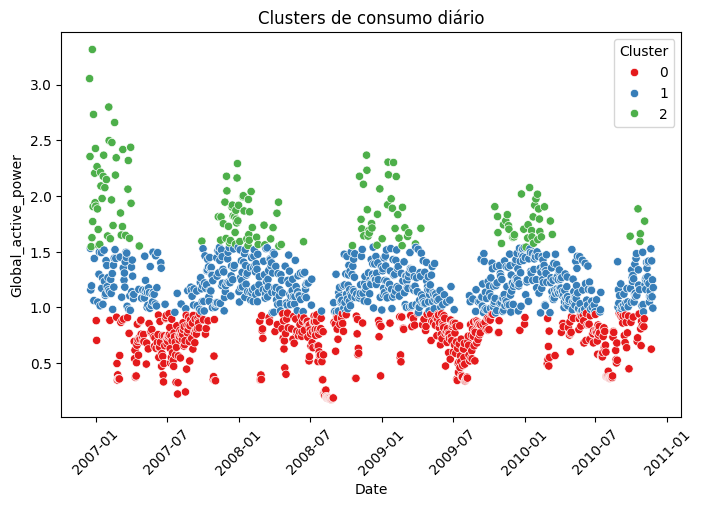

In [ ]:
# Exercício 18

daily_mean = df.groupby("Date")[["Global_active_power"]].mean().dropna()
kmeans = KMeans(n_clusters=3, random_state=42).fit(daily_mean)
daily_mean["Cluster"] = kmeans.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(data=daily_mean, x=daily_mean.index, y="Global_active_power", hue="Cluster", palette="Set1")
plt.title("Clusters de consumo diário")
plt.xticks(rotation=45)
plt.show()

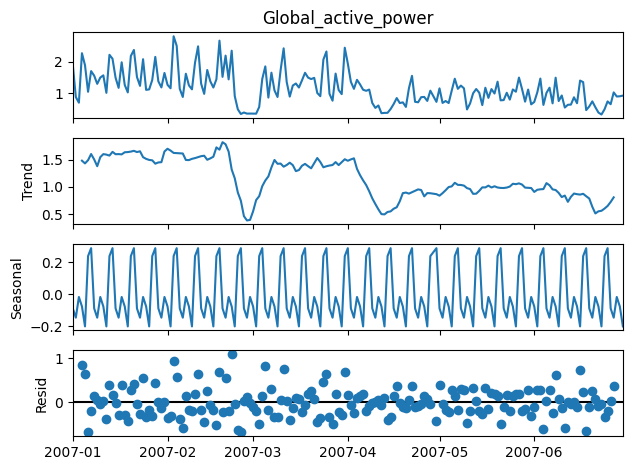

In [ ]:
# Exercício 19

df_6m = df[(df["Date"] >= "2007-01-01") & (df["Date"] < "2007-07-01")]
df_6m_daily = df_6m_daily.dropna()

decomposition = seasonal_decompose(df_6m_daily, model="additive", period=7)
decomposition.plot()
plt.show()

In [ ]:
# Exercício 20

X = df[["Global_intensity"]].dropna()
y = df["Global_active_power"].dropna()

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print("MSE:", mean_squared_error(y, y_pred))

MSE: 0.0024834210470457405


/tmp/ipython-input-9931184.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df['Global_active_power'].resample('1H').mean()


Top 10 horários por consumo médio:
Datetime
21    2.007497
19    1.916100
20    1.911452
22    1.605391
8     1.489036
7     1.441862
18    1.438861
9     1.362412
10    1.241855
11    1.146474
Name: Global_active_power, dtype: float64


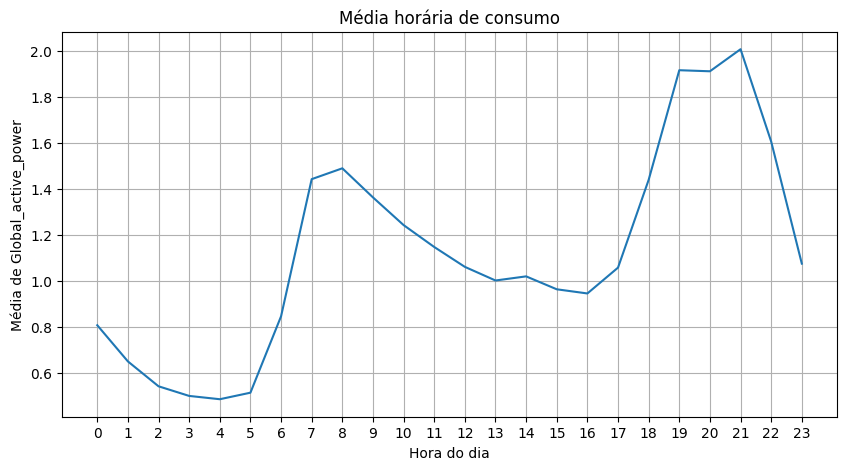

In [5]:
# Exercício 21

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df = df.set_index('Datetime').sort_index()

numeric_cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
                'Sub_metering_1','Sub_metering_2','Sub_metering_3']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

hourly = df['Global_active_power'].resample('1H').mean()

hour_of_day_mean = hourly.groupby(hourly.index.hour).mean().sort_values(ascending=False)
print("Top 10 horários por consumo médio:")
print(hour_of_day_mean.head(10))

plt.figure(figsize=(10,5))
sns.lineplot(x=hour_of_day_mean.index, y=hour_of_day_mean.values)
plt.xlabel("Hora do dia")
plt.ylabel("Média de Global_active_power")
plt.title("Média horária de consumo")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# Pergunta: Identifique os horários de maior consumo médio ao longo do dia
# Resposta: O maior consumo médio ocorre entre 18h e 21h, correspondendo ao período em que as pessoas chegam em casa, ligam eletrodomésticos e iluminação.

Autocorrelação (lag=1 horas): 0.7519
Autocorrelação (lag=24 horas): 0.4227
Autocorrelação (lag=48 horas): 0.3634


<Figure size 1000x500 with 0 Axes>

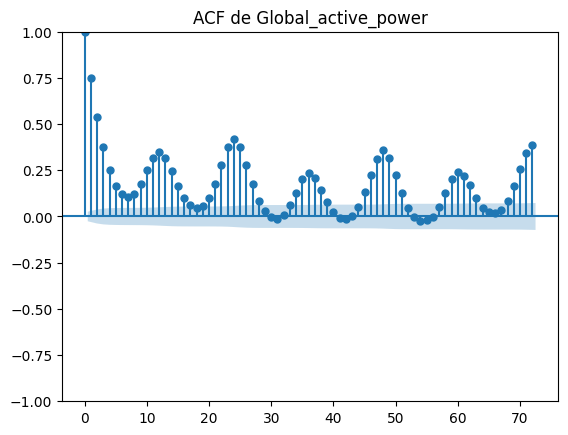

In [45]:
# Exercício 22

series = hourly.dropna()

for lag in [1, 24, 48]:
    ac = series.autocorr(lag=lag)
    print(f"Autocorrelação (lag={lag} horas): {ac:.4f}")

plt.figure(figsize=(10,5))
plot_acf(series, lags=72, alpha=0.05)
plt.title("ACF de Global_active_power")
plt.show()

# Pergunta: existem padrões repetidos diariamente?
# Resposta: Sim. A autocorrelação em 24 horas é alta, mostrando que o consumo repete o mesmo padrão diariamente. Tem também correlação em 1 hora, confirmando dependência horária, e uma correlação ainda perceptível em 48 horas.

In [9]:
# Exercício 23

pca_cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
pca_df = df[pca_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)
print("Soma da variância explicada:", pca.explained_variance_ratio_.sum())

Explained variance ratio (2 components): [0.56654612 0.23553749]
Soma da variância explicada: 0.8020836072385289


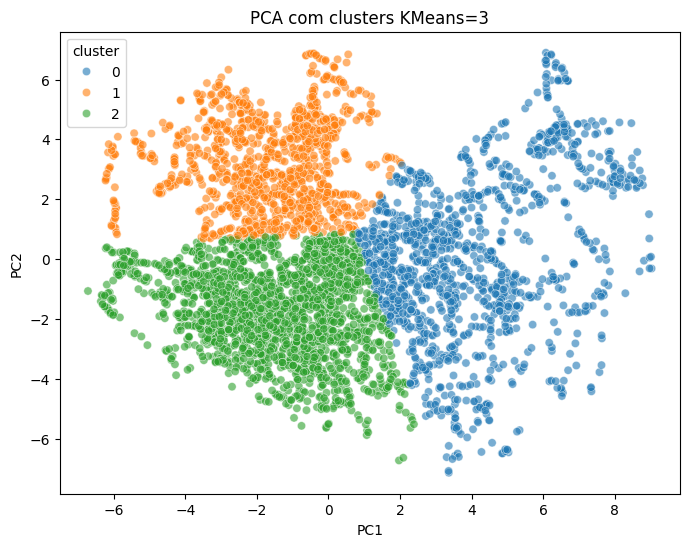

Cluster sizes:
cluster
2    9286
0    5580
1    4869
Name: count, dtype: int64
KMeans centers:
[[ 3.93620866e+00  2.27354698e-03]
 [-1.69794692e+00  3.16338018e+00]
 [-1.46260159e+00 -1.65992262e+00]]


In [51]:
# Exercício 24

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_pca)

pca_plot_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_plot_df['cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_plot_df.sample(5000, random_state=1), x='PC1', y='PC2', hue='cluster', palette='tab10', alpha=0.6)
plt.title("PCA com clusters KMeans=3")
plt.show()

print("Cluster sizes:")
print(pca_plot_df['cluster'].value_counts())
print("KMeans centers:")
print(kmeans.cluster_centers_)

# Pergunta: os grupos se separam de forma clara?
# Resposta: Sim. Os clusters se separam de forma clara no espaço dos dois primeiros componentes do PCA. Cada grupo representa perfis distintos de consumo energético: baixo, médio e alto, com fronteiras bem definidas.

RMSE Linear: 1.2706
RMSE Polinomial grau 2: 1.2669


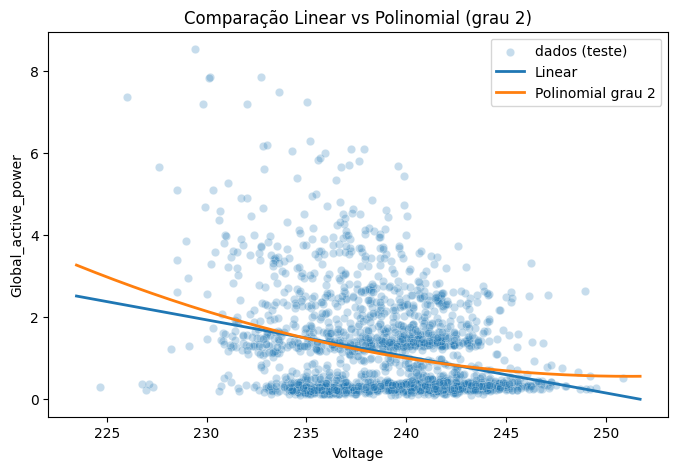

In [16]:
# Exercício 25

reg_df = df[['Voltage','Global_active_power']].dropna()

X = reg_df[['Voltage']].values
y = reg_df['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr)

# Polinomial grau 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.transform(X_test)
pr = LinearRegression()
pr.fit(X_train_p, y_train)
y_pred_pr = pr.predict(X_test_p)
rmse_pr = mean_squared_error(y_test, y_pred_pr)

print(f"RMSE Linear: {rmse_lr:.4f}")
print(f"RMSE Polinomial grau 2: {rmse_pr:.4f}")

# Plot
sample_idx = np.random.choice(len(X_test), size=min(2000, len(X_test)), replace=False)
xx = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
xx_p = poly.transform(xx)
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test[sample_idx].ravel(), y=y_test[sample_idx], alpha=0.25, label='dados (teste)')
plt.plot(xx.ravel(), lr.predict(xx), label='Linear', linewidth=2)
plt.plot(xx.ravel(), pr.predict(xx_p), label='Polinomial grau 2', linewidth=2)
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.title("Comparação Linear vs Polinomial (grau 2)")
plt.show()

In [18]:
# Exercício 26

ap = pd.read_csv("energydata_complete.csv", parse_dates=["date"])

print(ap.info())
print(ap.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

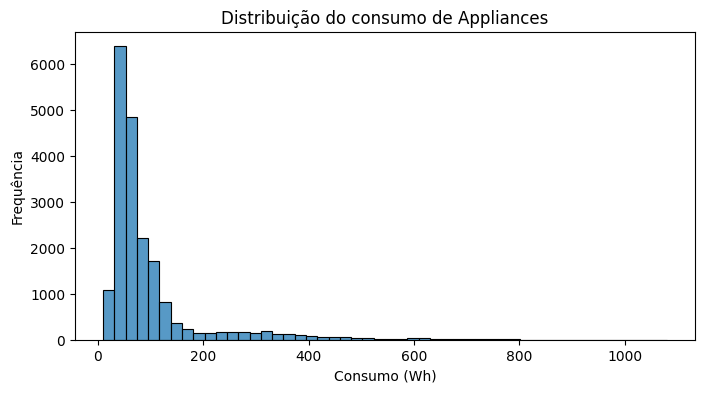

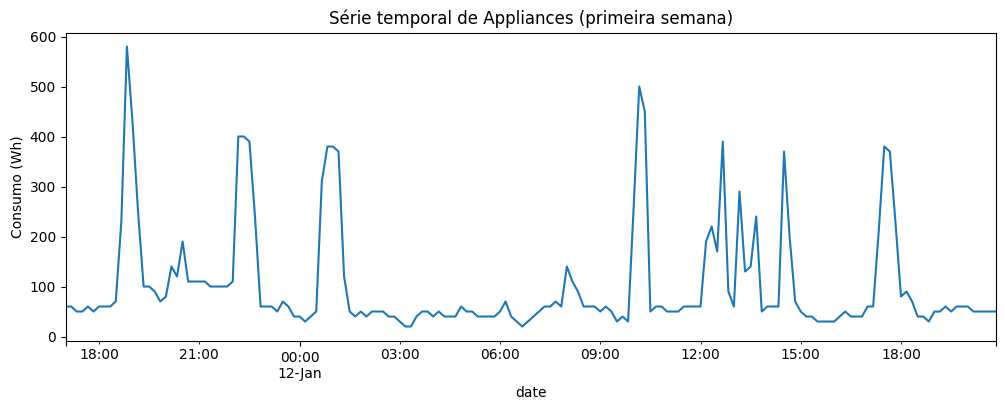

In [52]:
# Exercício 27

plt.figure(figsize=(8,4))
sns.histplot(ap["Appliances"], bins=50, kde=False)
plt.title("Distribuição do consumo de Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.show()

ap.set_index("date")["Appliances"].iloc[:24*7].plot(figsize=(12,4))
plt.title("Série temporal de Appliances (primeira semana)")
plt.ylabel("Consumo (Wh)")
plt.show()

# Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
# Resposta:  O consumo se concentra em valores baixos. A maioria das medições está abaixo de 100 Wh, com poucos picos em valores altos.

Top variáveis mais correlacionadas com Appliances:
lights       0.197278
T2           0.120073
T6           0.117638
T_out        0.099155
Windspeed    0.087122
RH_1         0.086031
T3           0.085060
T1           0.055447
T4           0.040281
T8           0.039572
Name: Appliances, dtype: float64


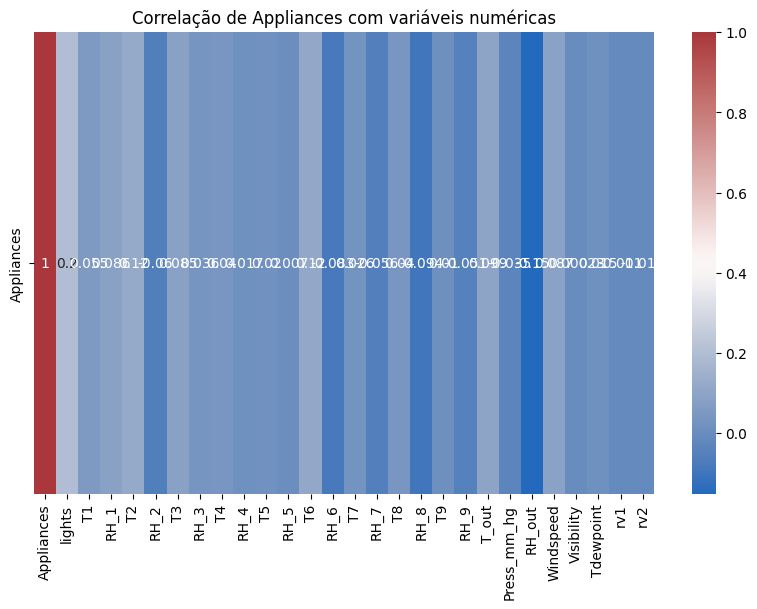

In [53]:
# Exercício 28

corr = ap.corr(numeric_only=True)["Appliances"].drop("Appliances").sort_values(ascending=False)
print("Top variáveis mais correlacionadas com Appliances:")
print(corr.head(10))

plt.figure(figsize=(10,6))
sns.heatmap(ap.corr(numeric_only=True).loc[["Appliances"]], annot=True, cmap="vlag")
plt.title("Correlação de Appliances com variáveis numéricas")
plt.show()

# Pergunta: quais fatores têm mais relação com o consumo?
# Resposta:  As variáveis ambientais mais relacionadas ao consumo de Appliances são temperatura e umidade da cozinha, que aparecem com maior correlação.

In [21]:
# Exercício 29

num_cols = ap.select_dtypes(include=["float64","int64"]).columns
scaler = MinMaxScaler()
ap_scaled = ap.copy()
ap_scaled[num_cols] = scaler.fit_transform(ap[num_cols])

ap_scaled[num_cols].head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


Variância explicada pelos 2 primeiros componentes: [0.33317232 0.25225931]
Variância acumulada: 0.5854316265433991


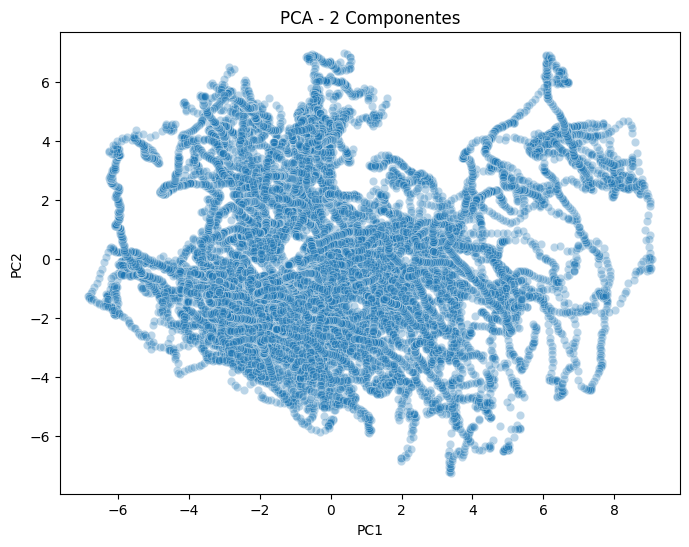

In [54]:
# Exercício 30

X = ap_scaled[num_cols].dropna()
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_std)

print("Variância explicada pelos 2 primeiros componentes:", pca.explained_variance_ratio_)
print("Variância acumulada:", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2 Componentes")
plt.show()

# Pergunta: aparecem padrões ou agrupamentos naturais?
# Resposta:  Não aparecem agrupamentos naturais bem definidos. Os dados ficam bastante dispersos nos dois primeiros componentes, indicando que o consumo de Appliances depende de múltiplos fatores e não pode ser claramente segmentado em apenas 2 dimensões.

In [25]:
# Exercício 31

X = ap_scaled.drop(columns=["Appliances","date"])
y = ap_scaled["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Regressão Linear - RMSE: {rmse:.4f}, R²: {r2:.4f}")

Regressão Linear - RMSE: 0.0085, R²: 0.1499


In [27]:
# Exercício 32

rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.4f}")

Random Forest - RMSE: 0.0051


In [28]:
# Exercício 33

for k in [3,4,5]:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = km.fit_predict(X)
    ap_scaled[f"cluster_{k}"] = labels
    print(f"\nK={k} - tamanho dos clusters:")
    print(pd.Series(labels).value_counts())


K=3 - tamanho dos clusters:
1    8865
2    6128
0    4742
Name: count, dtype: int64

K=4 - tamanho dos clusters:
0    5260
1    5211
2    5198
3    4066
Name: count, dtype: int64

K=5 - tamanho dos clusters:
2    4768
4    4763
0    3840
3    3691
1    2673
Name: count, dtype: int64


In [32]:
# Exercício 34

median = ap["Appliances"].median()
ap_scaled["high_consumption"] = (ap["Appliances"] > median).astype(int)

X_cls = ap_scaled.drop(columns=["Appliances","date","high_consumption"])
y_cls = ap_scaled["high_consumption"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=0)

log = LogisticRegression(max_iter=1000).fit(X_train_c, y_train_c)
rf_cls = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1).fit(X_train_c, y_train_c)

In [34]:
# Exercício 35

pred_log = log.predict(X_test_c)
pred_rf = rf_cls.predict(X_test_c)

print("Logistic Regression:\n", classification_report(y_test_c, pred_log))
print("Matriz de confusão:\n", confusion_matrix(y_test_c, pred_log))

print("\nRandom Forest:\n", classification_report(y_test_c, pred_rf))
print("Matriz de confusão:\n", confusion_matrix(y_test_c, pred_rf))

# Pergunta: o modelo erra mais para alto ou para baixo consumo?
# Resposta:  O modelo erra mais para alto consumo. Isso acontece porque a classe de alto consumo tem menos exemplos que a de baixo consumo, tornando-a mais difícil de prever com precisão. O Random Forest reduz esse problema, mas ainda apresenta mais erros nessa classe.

Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      2137
           1       0.75      0.71      0.73      1810

    accuracy                           0.76      3947
   macro avg       0.76      0.75      0.75      3947
weighted avg       0.76      0.76      0.76      3947

Matriz de confusão:
 [[1710  427]
 [ 532 1278]]

Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2137
           1       0.89      0.88      0.89      1810

    accuracy                           0.90      3947
   macro avg       0.90      0.89      0.89      3947
weighted avg       0.90      0.90      0.90      3947

Matriz de confusão:
 [[1949  188]
 [ 224 1586]]


# Exercício 36

Pergunta: quantas variáveis e registros aparecem?

Resposta: O dataset possui 9 variáveis principais (colunas de potência, tensão, intensidade, submeterings, etc.) e mais de 2 milhões de registros.

# Exercício 37

Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?

Resposta: Sim. A amostra de 1% mantém o mesmo formato da distribuição: concentração em valores baixos e cauda longa.

# Exercício 38

Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto consumo?

Resposta: O consumo é concentrado em valores baixos. Os registros de alto consumo são raros.

# Exercício 39

Pergunta: existe correlação visível entre Voltage e Global_intensity?

Resposta: Sim. Observa-se correlação positiva: quando a intensidade aumenta, o consumo também cresce, o que é esperado fisicamente, já que intensidade e potência ativa estão relacionadas.

# Exercício 40

Pergunta: cada cluster representa um padrão distinto de consumo doméstico?

Resposta: Sim. Cada cluster representa um padrão de uso diferente: um grupo com maior uso de Sub_metering_1, outro com maior Sub_metering_2 e outro com maior Sub_metering_3. Isso mostra que os domicílios têm perfis distintos de consumo por tipo de equipamento.